# Aprendizaje automático - Sesión 01
## 1 - Algoritmos vecinos más cercanos

¿Cuádo nos puede resultar útil k-nn?

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/datos01_train.csv")

Visualizar un conjunto de datos (funcion)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

colors = {0: "#4A249D", 1: "#0D7C66"}

def visualizar_datos(df_datos: pd.DataFrame, df_labels: pd.DataFrame, title: str, x_label: str, y_label: str, legend_dict: dict = None, new_point: np.ndarray = None) -> tuple:
    if isinstance(df_datos, pd.DataFrame):
        df_datos = df_datos.to_numpy()

    if isinstance(df_labels, pd.DataFrame):
        df_labels = df_labels.to_numpy()

    fig, ax = plt.subplots(figsize=(5,5))
    
    # Visualizar los puntos de entrenamiento
    ax.scatter(df_datos[:, 0], df_datos[:, 1], c=[colors[c] for c in df_labels],
        s=100,
        edgecolor="k",
    )

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    if new_point is not None:
        ax.scatter(new_point[0], new_point[1], color="red", marker="*", s=200, label="Nueva persona")

    if legend_dict is not None:
        legend_elements = [
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[0], markersize=10, label=legend_dict[0]),
            Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[1], markersize=10, label=legend_dict[1]),
        ]

        if new_point is not None:
            legend_elements.append(Line2D([0], [0], marker="*", color="w", markerfacecolor="red", markersize=10, label="Nuevo punto"))

        plt.legend(handles=legend_elements)
    
    plt.show()

    return ax.get_xlim(), ax.get_ylim()

Visualizar un conjunto de datos (resultado)

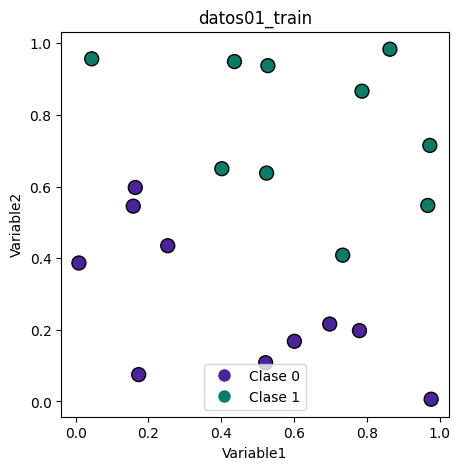

In [6]:
x_range, y_range =  visualizar_datos(df.iloc[:,:-1], df.iloc[:,-1], "datos01_train", "Variable1", "Variable2", {0: "Clase 0", 1: "Clase 1"})

### 1.1 Implementando k-nn
Distancia Euclidea (funcion)

In [7]:
def euclidean_distance(x, y):
    # 1. Restamos los arrays x e y elemento por elemento
    # 2. Elevamos al cuadrado cada una de las n diferencias
    # 3. np.sum suma todos los elementos resultantes
    # 4. np.sqrt calcula la raíz cuadrada de la suma
    return np.sqrt(np.sum((x - y)**2))

Calcular las distancias euclideas

In [8]:
# Tres personas de ejemplo
per_1 = np.array([70, 180])
per_2 = np.array([70, 170])
per_3 = np.array([80, 180])
print(f"La distancia Euclídea entre la persona 1 y la 2 es {euclidean_distance(per_1, per_2):.2f}")
print(f"La distancia Euclídea entre la persona 1 y la 3 es {euclidean_distance(per_1, per_3):.2f}")

La distancia Euclídea entre la persona 1 y la 2 es 10.00
La distancia Euclídea entre la persona 1 y la 3 es 10.00


Otro ejemplo con mas variables

In [9]:
# Dos puntos de ejemplo
punto_a = np.array([0.4, 0.5, 0.1, 0.3, 0.5])
punto_b = np.array([0.8, 0.7, 0.2, 0.8, 0.2])
print(f"La distancia Euclídea entre A y B es {euclidean_distance(punto_a, punto_b):.2f}")

La distancia Euclídea entre A y B es 0.74


Definimos la clase k-NN

In [10]:
from typing import Callable

class KNN:
    def __init__(self, k: int, dist_func: Callable[[float, float], float]) -> None:
        self.k = k
        self.dist_func = dist_func

    # Guardar los datos de entrenamiento
    def fit(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.to_numpy()

        if isinstance(y_train, pd.DataFrame):
            y_train = y_train.to_numpy()

        self.X_train = X_train
        self.y_train = y_train

    # Calcular distancias del nuevo punto a cada punto de entrenamiento
    def compute_distances(self, X_new: np.ndarray) -> None:
        return np.array([self.dist_func(X_new, x_train) for x_train in self.X_train])

    # Encontrar los índices de los k vecinos más cercanos
    def nearest_neighbors_idx(self, X_new: np.ndarray) -> None:
        distances = self.compute_distances(X_new)
        return np.argsort(distances)[: self.k]

    # Predecir la clase del nuevo punto
    def predict(self, X_new: np.ndarray) -> None:
        # Obtener las clases de los k vecinos más cercanos
        nearest_neighbors_classes = self.y_train[self.nearest_neighbors_idx(X_new)]

        # Predecir la clase por la mayoría de los vecinos
        return np.bincount(nearest_neighbors_classes).argmax()

### 1.3 Usando k-NN
Cargamos los datos de entrenamiento y visualizamos los datos

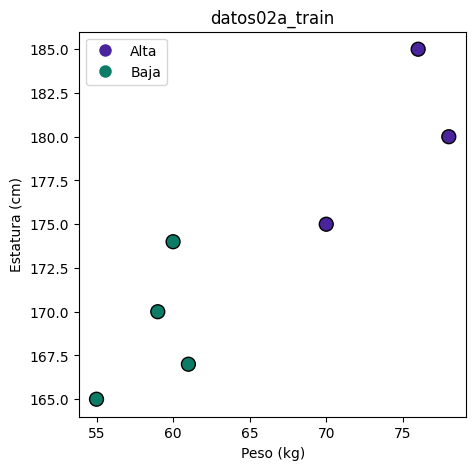

In [11]:
df = pd.read_csv("../datasets/datos02a_train.csv")

# Separar las variables (X) de las etiquetas (y)
X_train = df[["Peso", "Estatura"]]
y_train = df["ActividadFisica"]

dict_clases = {0: "Alta", 1: "Baja"}

x_range, y_range = visualizar_datos(X_train, y_train, "datos02a_train", "Peso (kg)", "Estatura (cm)", dict_clases)

Vamos a aplicar el algoritmo con k=3